# Тестируем библиотеки на Хабре

In [1]:
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from memory_profiler import profile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.extensions = [
   'autoreload',
   'memory_profiler']

sys.path.insert(0, 'parsers/bs4')
sys.path.insert(0, 'parsers/scrapy')
%load_ext memory_profiler

In [2]:
# Загружаем файлы
html_source_list_bs4 = ['/Users/alexandrasorokovikova/2 курс/new project/Parsing-with-python-1/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]
html_source_list_scrapy = ['file:/Users/alexandrasorokovikova/2 курс/new project/Parsing-with-python-1/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())
        
def select_pages(page_limit, pages):
    return pages[:page_limit]
    

### BeautifulSoup

In [3]:
from parsers.bs4.habr_parser import parse_habr_bs4
from parsers.bs4.parse_bs4 import parse_bs4

Запустим парсинг на разном количестве страниц: сначала на 2, потом на 102, потом на 202 и так далее до 1396.

In [4]:
bs_time_measure = []
for page_limit in tqdm(range(2, 1396, 100)):
    pages = select_pages(page_limit, html_files)
    habr_data = []
    
    # замеряем время
    s = time.time()
    parse_bs4(parse_habr_bs4, pages, habr_data)
    t = time.time()
    
    bs_time_measure.append(t-s)
    

100%|██████████| 14/14 [00:00<00:00, 3250.50it/s]


### Scrapy

In [5]:
from parsers.scrapy.habrSpider import habrSpider
from parsers.scrapy.parse_scrapy import parse_scrapy

Запустим парсинг на разном количестве страниц: сначала на 2, потом на 102, потом на 202 и так далее до 1396.

In [6]:
scrapy_time_measure = []
for page_limit in tqdm(range(2, 1396, 100)):
    pages = select_pages(page_limit, html_source_list_scrapy)
    habr_data = []
    
    # замеряем время
    s = time.time()
    parse_scrapy(habrSpider, pages, habr_data)
    t = time.time()
    
    scrapy_time_measure.append(t-s)

100%|██████████| 14/14 [01:21<00:00,  5.79s/it]


## Сравниваем время работы

### BeautifulSoup

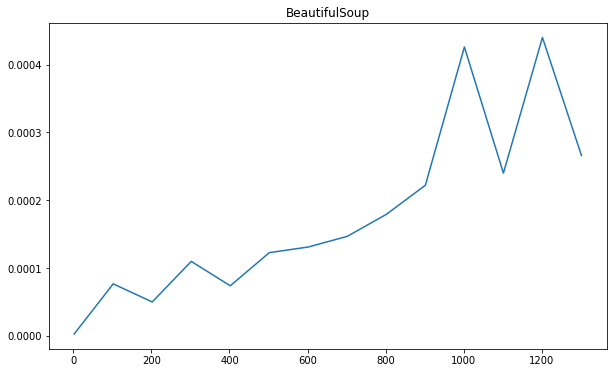

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 1396, 100), bs_time_measure)
plt.title("BeautifulSoup")
plt.show()

### Scrapy

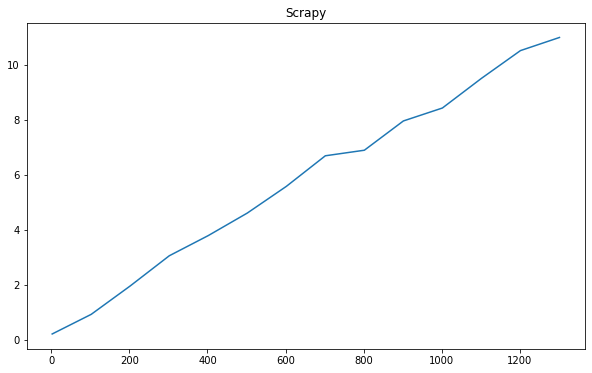

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 1396, 100), scrapy_time_measure)
plt.title("Scrapy")
plt.show()

## Сравниваем используемую память

In [9]:
%%file memory_bs4.py

from parsers.bs4.habr_parser import parse_habr_bs4
from parsers.bs4.parse_bs4 import parse_bs4

html_source_list_bs4 = ['/Users/alexandrasorokovikova/2 курс/new project/Parsing-with-python-1/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]
html_source_list_scrapy = ['file:/Users/alexandrasorokovikova/2 курс/new project/Parsing-with-python-1/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())

def select_pages(page_limit, pages):
    return pages[:page_limit]

@profile
def test_bs4():
    for page_limit in range(2, 1396, 100):
        pages = select_pages(page_limit, html_files)
        habr_data = []

        parse_bs4(parse_habr_bs4, pages, habr_data)
        
test_bs4()

Overwriting memory_bs4.py


In [10]:
!python -m memory_profiler memory_bs4.py

Filename: memory_bs4.py

Line #    Mem usage    Increment  Occurences   Line Contents
    16  299.234 MiB  299.234 MiB           1   @profile
    17                                         def test_bs4():
    18  300.152 MiB    0.004 MiB          15       for page_limit in range(2, 1396, 100):
    19  300.152 MiB    0.027 MiB          14           pages = select_pages(page_limit, html_files)
    20  300.152 MiB    0.000 MiB          14           habr_data = []
    21                                         
    22  300.152 MiB    0.887 MiB          14           parse_bs4(parse_habr_bs4, pages, habr_data)




In [11]:
%%file memory_scrapy.py

from parsers.scrapy.habrSpider import habrSpider
from parsers.scrapy.parse_scrapy import parse_scrapy

html_source_list_bs4 = ['/Users/alexandrasorokovikova/2 курс/new project/Parsing-with-python-1/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]
html_source_list_scrapy = ['file:/Users/alexandrasorokovikova/2 курс/new project/Parsing-with-python-1/tests/habr/tests_source/test{0}.html'.format(i) for i in range(1, 1396)]

html_files = []
for html in html_source_list_bs4:
    with open(html) as html_file:
        html_files.append(html_file.read())

def select_pages(page_limit, pages):
    return pages[:page_limit]

@profile
def test_scrapy():
    for page_limit in range(2, 1396, 100):
        pages = select_pages(page_limit, html_files)
        habr_data = []

        parse_scrapy(habrSpider, pages, habr_data)
        
test_scrapy()

Overwriting memory_scrapy.py


In [12]:
!python -m memory_profiler memory_scrapy.py

Filename: memory_scrapy.py

Line #    Mem usage    Increment  Occurences   Line Contents
    16  311.738 MiB  311.738 MiB           1   @profile
    17                                         def test_scrapy():
    18  358.277 MiB   -9.832 MiB          15       for page_limit in range(2, 1396, 100):
    19  355.023 MiB   -9.836 MiB          14           pages = select_pages(page_limit, html_files)
    20  355.023 MiB   -9.836 MiB          14           habr_data = []
    21                                         
    22  358.277 MiB   36.699 MiB          14           parse_scrapy(habrSpider, pages, habr_data)


